In [68]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
data = pd.read_csv("housing.csv")

In [49]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [50]:
data.dropna(inplace = True)

In [51]:
#can check for null values using this function bc it counts no-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [52]:
from sklearn.model_selection import train_test_split
#splitting the data
x = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

In [53]:
#test size is percent of data that will be used for testing
#test set only looked at when you are done with the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [54]:
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

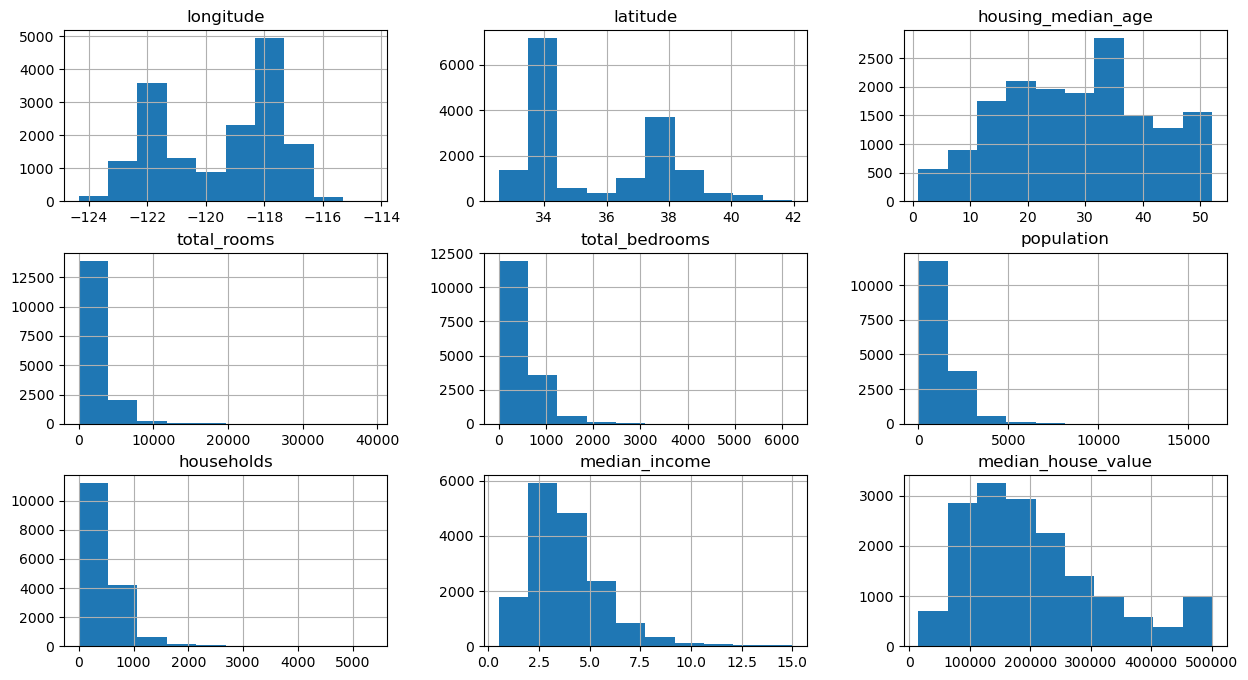

In [55]:
train_data.hist(figsize=(15,8))

<Axes: >

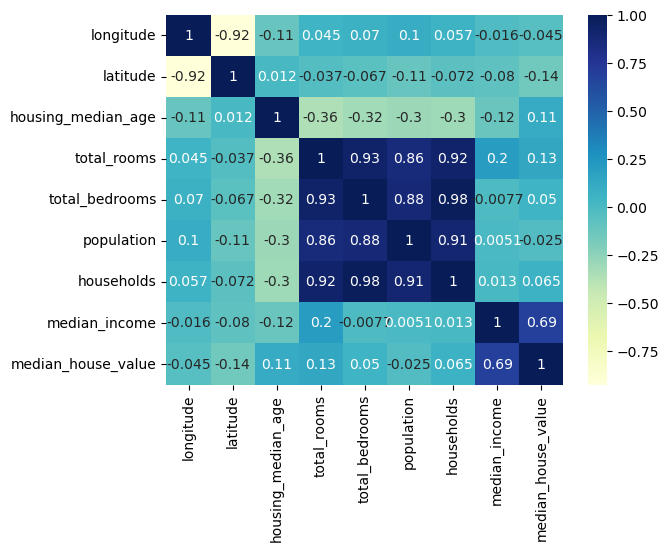

In [56]:
prac_data = data.drop(['ocean_proximity'], axis = 1)
sns.heatmap(prac_data.corr(), annot = True, cmap = "YlGnBu")

In [57]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

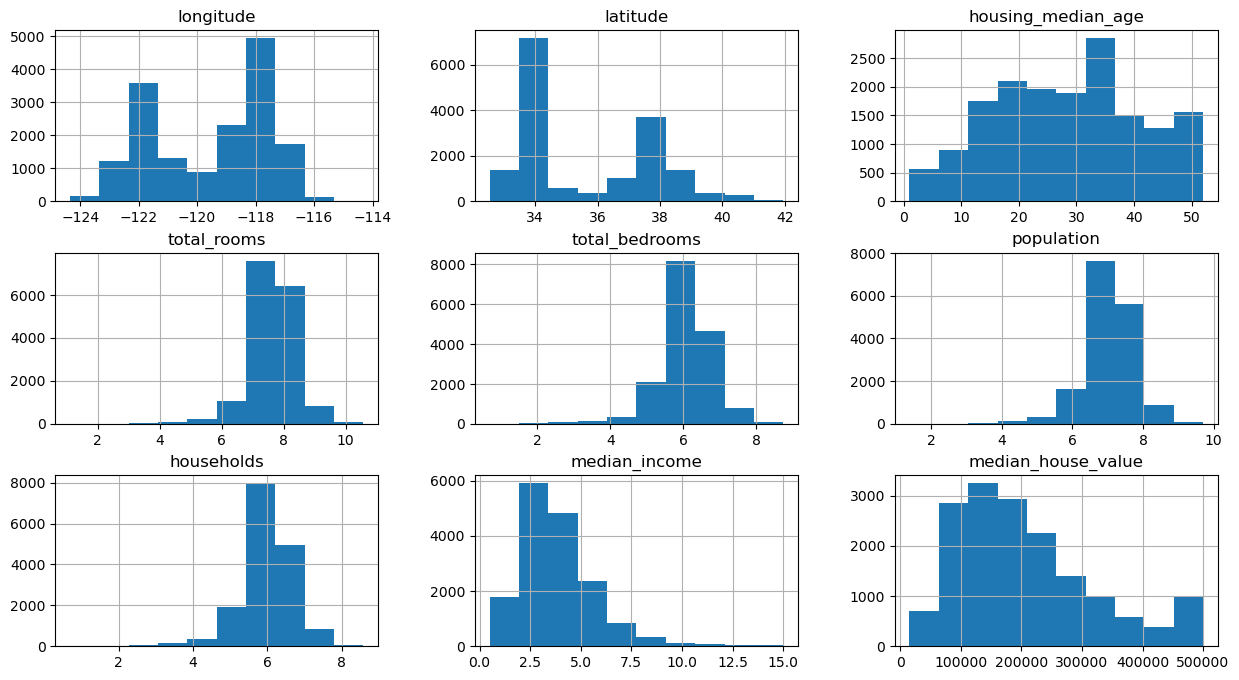

In [58]:
train_data.hist(figsize= (15,8))

In [59]:
train_data.ocean_proximity.value_counts()
#perform one hot encoding on this variable
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

<Axes: >

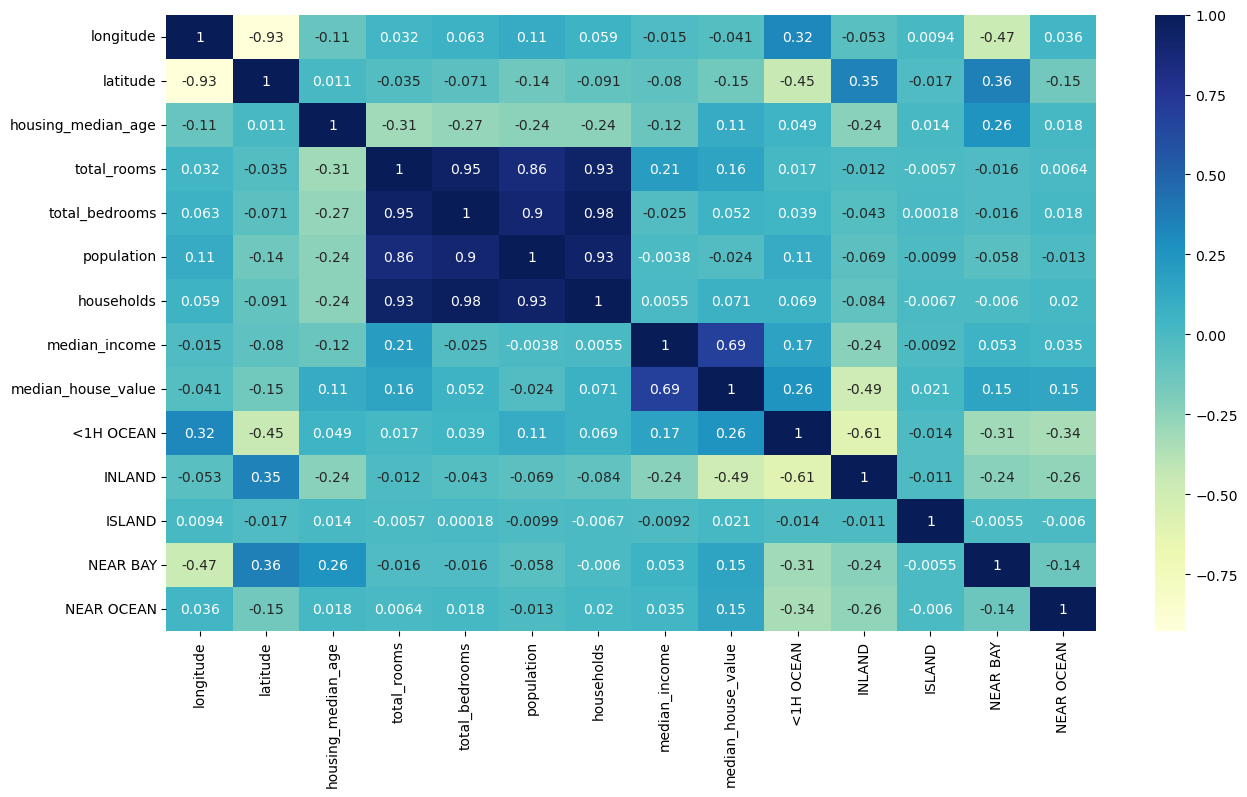

In [60]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

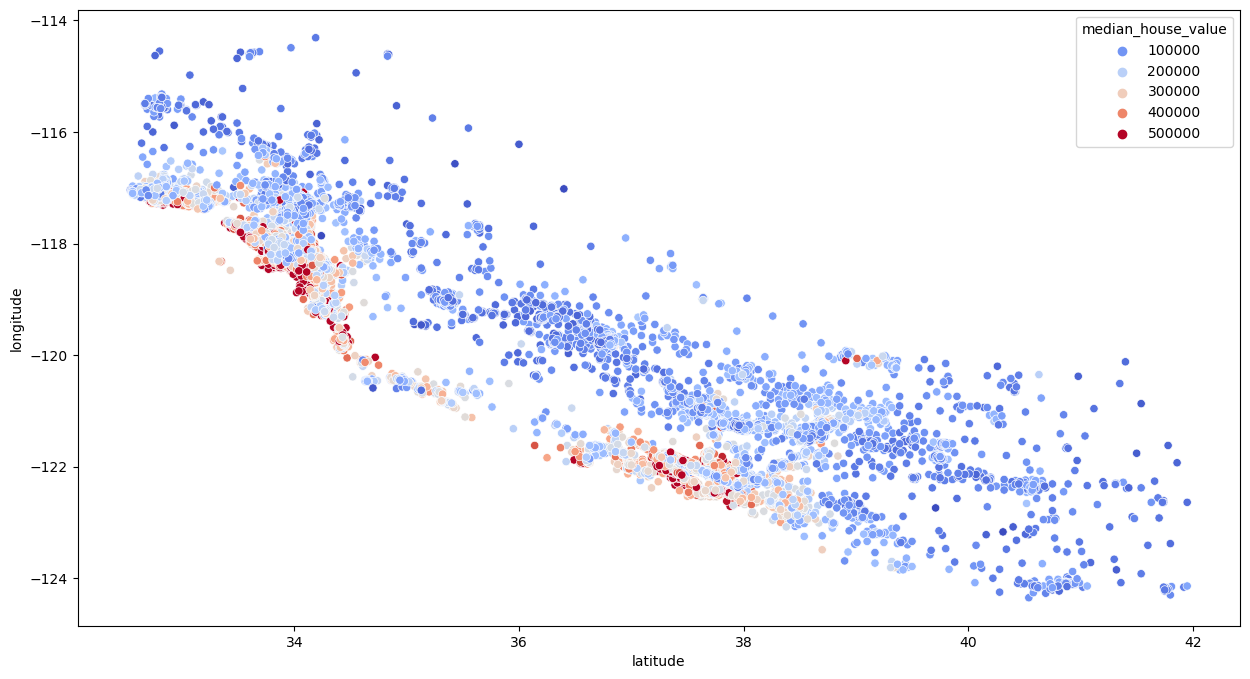

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(x = "latitude", y= "longitude", data = train_data, hue = "median_house_value", palette = "coolwarm" )

In [62]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"]/train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"]/train_data["households"]

In [63]:
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



x_train, y_train = train_data.drop(["median_house_value"], axis =1 ) , train_data["median_house_value"]
x_train_s = scaler.fit_transform(x_train)
reg = LinearRegression()

reg.fit(x_train_s, y_train)

LinearRegression()

In [64]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"]/test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"]/test_data["households"]

In [65]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1940,-120.96,38.66,11.0,2339.0,436.0,1062.0,380.0,3.9036,INLAND
10167,-117.94,33.89,30.0,2577.0,404.0,1076.0,374.0,6.7528,<1H OCEAN
17799,-121.82,37.38,32.0,1650.0,246.0,768.0,263.0,6.8462,<1H OCEAN
11320,-117.97,33.76,18.0,1862.0,399.0,1301.0,369.0,3.1771,<1H OCEAN
12611,-121.52,38.53,31.0,3089.0,585.0,1366.0,561.0,4.2885,INLAND
...,...,...,...,...,...,...,...,...,...
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,<1H OCEAN
11509,-118.10,33.74,33.0,2119.0,524.0,872.0,465.0,4.5370,NEAR OCEAN
12946,-121.29,38.65,27.0,2744.0,464.0,1340.0,452.0,3.8816,INLAND
4940,-118.27,33.99,35.0,932.0,294.0,1153.0,282.0,1.4886,<1H OCEAN


In [66]:
x_test, y_test = test_data.drop(["median_house_value"], axis =1 ) , test_data["median_house_value"]
x_test_s = scaler.transform(x_test)

In [67]:
reg.score(x_test_s, y_test)

0.679328504762999

In [71]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(x_train_s, y_train)



RandomForestRegressor()

In [72]:
forest.score(x_test_s, y_test)

0.8196208628355262

In [74]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid = {
    "n_estimators" : [100, 200, 300], 
    "min_samples_split" : [2,4],
    "max_depth" : [None, 4, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv = 5, scoring = "neg_mean_squared_error", return_train_score = True)

grid_search.fit(x_train_s, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [75]:
best_forest = grid_search.best_estimator_

In [76]:
best_forest.score(x_test_s, y_test)

0.8156694879219063

In [ ]:
grid_search.best_estimator_.score(x_test_s,y_test)